# Imports

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# Read Csv file

In [321]:
# Movies=pd.read_csv("Movies.csv")
movies = pd.read_csv("IMDb Movies India.csv", encoding="ISO-8859-1")
movies.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


# Exploratory Analysis

In [322]:
movies.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [323]:
movies.shape

(15509, 10)

In [324]:
movies.describe() #For numeric data only

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [325]:
#For objects or Categorical data only
movies.describe(include="object")

,Name,Year,Duration,Genre,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7920,14984,13892,13125,12365
unique,13838,102,182,485,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,227,58,158,83,91


In [326]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [327]:
movies.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [328]:
type(movies)

pandas.core.frame.DataFrame

In [329]:
#Basic Stats for all numeric and non-numeric variables
movies.describe(include='all')

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.841621,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.381777,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800000,NaN,NaN,NaN,NaN,NaN


In [330]:
movies.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

# Filtering and Removing Duplicates

In [331]:
#To check if the duplicate values present or not
movies.duplicated().sum()

6

In [332]:
movies.duplicated().value_counts()

False    15503
True         6
dtype: int64

In [333]:
#checking rows and columns in original file
movies.shape

(15509, 10)

In [334]:
#Creating a copy so that there would be no change in original file 
df=movies.copy()

In [335]:
#To check if the all the duplicate rows based on the specified columns
df.duplicated(subset=['Name','Year', 'Duration','Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3']).value_counts()

False    15503
True         6
dtype: int64

In [336]:
# Dropping all the duplicates 
df.drop_duplicates(subset=['Name','Year', 'Duration','Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'], inplace=True)

In [337]:
#To check if the duplicate values are still present or not
df.duplicated().value_counts()

False    15503
dtype: int64

In [338]:
df.duplicated().sum()

0

In [339]:
# Checking the rows and columns of copied file
df.shape

(15503, 10)

In [340]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [341]:
df.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [342]:
#Dropping the 1st row from the dataset as there is no name available for the movie
data=df.drop(df.index[0])

In [343]:
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [344]:
#Resetting the index
data.set_index(np.arange(len(data)),inplace=True)

In [345]:
#The index value is fixed and the name with no name is removed
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor


In [346]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

# Data Cleaning

In [347]:
# This function is used to show if the series of data frame contains NaN or Null value or not.
data.isna()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,True,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
15497,False,False,True,False,False,False,False,False,False,False
15498,False,False,False,False,False,False,False,False,False,False
15499,False,False,True,False,True,True,False,False,True,True
15500,False,False,True,False,True,True,True,True,True,True


In [348]:
data.isnull().sum()

Name           0
Year         526
Duration    8263
Genre       1876
Rating      7583
Votes       7582
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [349]:
#Finding Null values in whole dataset
data.isnull().sum().sort_values(ascending=True)

Name           0
Director     524
Year         526
Actor 1     1615
Genre       1876
Actor 2     2381
Actor 3     3140
Votes       7582
Rating      7583
Duration    8263
dtype: int64

In [350]:
#Finding percentage of Null Values in whole dataset
data.isnull().sum().sort_values(ascending=False)/len(df)

Duration    0.532994
Rating      0.489131
Votes       0.489067
Actor 3     0.202541
Actor 2     0.153583
Genre       0.121009
Actor 1     0.104173
Year        0.033929
Director    0.033800
Name        0.000000
dtype: float64

In [351]:
# Remove rows with missing values from columns 1 to 9
data.dropna(subset=data.columns[1:9], how='all', inplace=True)

In [352]:
# Remove rows with missing values in columns 1,2,4,5
data.dropna(subset=data.columns[[1, 2, 4, 5]], how='all', inplace=True)

In [353]:
#Dropping remaining null values / removing remaining empty rows
data.dropna(subset=['Year'],inplace=True)
data.dropna(subset=['Genre'],inplace=True)

In [354]:
data.isna().sum()

Name           0
Year           0
Duration    6205
Genre          0
Rating      5319
Votes       5318
Director     480
Actor 1     1110
Actor 2     1537
Actor 3     2051
dtype: int64

- It is evident from the data that several numeric variables are currently stored as object type. To conduct a thorough analysis, it is imperative that we convert these variables to their appropriate numeric data type.

In [355]:
data.dtypes

Name         object
Year         object
Duration     object
Genre        object
Rating      float64
Votes        object
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

In [356]:
# remove warnings
#removing the paranthesis 
import warnings
warnings.simplefilter("ignore")
data['Year'] = data['Year'].str.replace('(','').str.replace(')','')

In [357]:
#Changing the datatype of 'Duration' column
data['Duration']= data['Duration'].str.replace('min','').apply(pd.to_numeric)

#Changing datatype with of string to numeric
data["Votes"]=data["Votes"].replace("$5.16M", 516)
data["Votes"] = pd.to_numeric(data['Votes'].str.replace(',',''))

- We've noticed that we can fill in the null values for Rating,Duration and Votes.  However, the null values of  Director,Actor1,Actor2 and Actor3 columns cannot be replaced but that's okay because these missing values won't greatly affect our analysis.

In [358]:
#replacing null values with the most common rating given to an Indian Movie
data['Rating'].fillna(data['Rating'].mode().max(),inplace=True)

#replacing null values with average duration of an Indian movie
data['Duration'].fillna(data['Duration'].mean(),inplace=True)

#replacing null values with average votes received by a movie
data['Votes'].fillna(data['Votes'].mean(),inplace=True)

In [359]:
# null values are removed from the main columns
data.isnull().sum()

Name           0
Year           0
Duration       0
Genre          0
Rating         0
Votes          0
Director     480
Actor 1     1110
Actor 2     1537
Actor 3     2051
dtype: int64

In [360]:
data.head(15)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.000000,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021,90.000000,"Drama, Musical",6.2,1963.643981,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,2019,110.000000,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,2010,105.000000,Drama,6.2,1963.643981,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,1997,147.000000,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Yahaan,2005,142.000000,"Drama, Romance, War",7.4,1086.000000,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,.in for Motion,2008,59.000000,Documentary,6.2,1963.643981,Anirban Datta,NaN,NaN,NaN
7,?: A Question Mark,2012,82.000000,"Horror, Mystery, Thriller",5.6,326.000000,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
8,@Andheri,2014,116.000000,"Action, Crime, Thriller",4.0,11.000000,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
9,1:1.6 An Ode to Lost Love,2004,96.000000,Drama,6.2,17.000000,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni


In [361]:
data.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15492,Zulm Ka Jawab,1995,128.194633,Action,6.2,1963.643981,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15493,Zulm Ka Muqabla,1993,128.194633,Action,6.2,1963.643981,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15494,Zulm Ki Hukumat,1992,128.194633,"Action, Crime, Drama",5.3,135.000000,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15495,Zulm Ki Pukar,1979,128.194633,Action,6.2,1963.643981,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15496,Zulm Ki Zanjeer,1989,125.000000,"Action, Crime, Drama",5.8,44.000000,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15497,Zulm Ko Jala Doonga,1988,128.194633,Action,4.6,11.000000,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15498,Zulmi,1999,129.000000,"Action, Drama",4.5,655.000000,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15499,Zulmi Raj,2005,128.194633,Action,6.2,1963.643981,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15500,Zulmi Shikari,1988,128.194633,Action,6.2,1963.643981,NaN,NaN,NaN,NaN
15501,Zulm-O-Sitam,1998,130.000000,"Action, Drama",6.2,20.000000,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [362]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,#Gadhvi (He thought he was Gandhi),2019,109.0,Drama,7.0,8.000000,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
1,#Homecoming,2021,90.0,"Drama, Musical",6.2,1963.643981,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
2,#Yaaram,2019,110.0,"Comedy, Romance",4.4,35.000000,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
3,...And Once Again,2010,105.0,Drama,6.2,1963.643981,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
4,...Aur Pyaar Ho Gaya,1997,147.0,"Comedy, Drama, Musical",4.7,827.000000,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
5,...Yahaan,2005,142.0,"Drama, Romance, War",7.4,1086.000000,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
6,.in for Motion,2008,59.0,Documentary,6.2,1963.643981,Anirban Datta,NaN,NaN,NaN
7,?: A Question Mark,2012,82.0,"Horror, Mystery, Thriller",5.6,326.000000,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
8,@Andheri,2014,116.0,"Action, Crime, Thriller",4.0,11.000000,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
9,1:1.6 An Ode to Lost Love,2004,96.0,Drama,6.2,17.000000,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni


In [363]:
data.shape

(13136, 10)

# Data Visualization

In [364]:
data.describe()

,Duration,Rating,Votes
count,13136.000000,13136.000000,13136.000000
mean,128.194633,5.985513,1963.643981
std,21.000188,1.080251,9006.645711
min,2.000000,1.100000,5.000000
25%,128.194633,5.700000,37.750000
50%,128.194633,6.200000,1248.500000
75%,133.000000,6.300000,1963.643981
max,321.000000,10.000000,591417.000000


In [365]:
data.describe(include='object')

,Name,Year,Genre,Director,Actor 1,Actor 2,Actor 3
count,13136,13136,13136,12656,12026,11599,11085
unique,12032,95,474,5339,4245,4424,4398
top,Albela,2019,Drama,Kanti Shah,Ashok Kumar,Rekha,Pran
freq,5,405,2646,57,149,82,83


In [366]:
data.dtypes

Name         object
Year         object
Duration    float64
Genre        object
Rating      float64
Votes       float64
Director     object
Actor 1      object
Actor 2      object
Actor 3      object
dtype: object

## Year with best Rating

In [367]:
#sorting the Year and Rating by 'Rating' and then selecting the top Rating
best_rating=data[['Year','Rating']]

In [368]:
best_rating.sort_values(by='Rating',ascending=False)

,Year,Rating
8335,2020,10.0
5406,2021,9.7
2560,2020,9.6
6848,2021,9.4
14215,2020,9.4
...,...,...
9635,2015,1.6
15033,2018,1.6
6740,2008,1.6
3615,2008,1.4


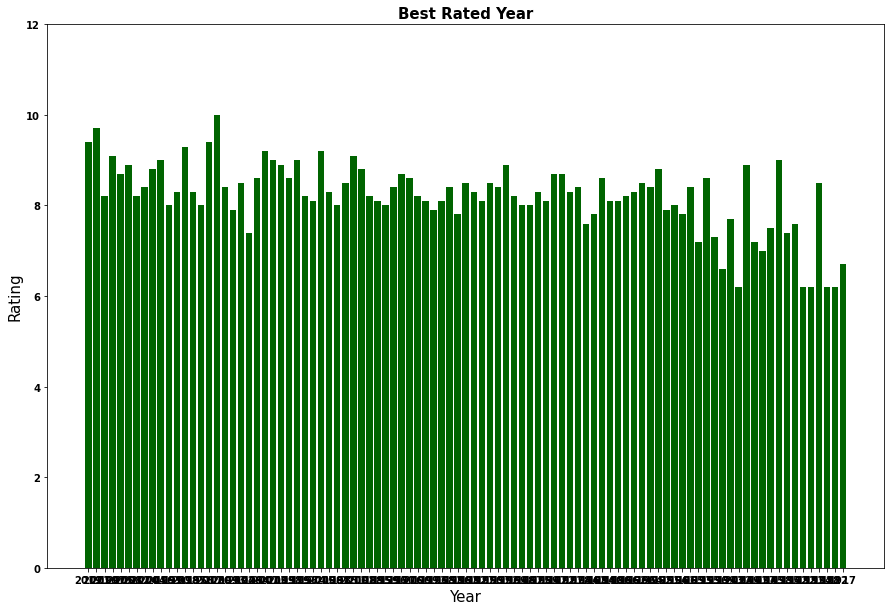

In [369]:
#Plotting Bar Graph
fig=plt.figure(figsize=(15,10))
bars=plt.bar(x='Year',height='Rating',data=best_rating,color='darkgreen')

plt.xlabel("Year",fontsize=15)
plt.ylabel("Rating",fontsize=15)
plt.title("Best Rated Year",fontsize=15,fontweight='bold')

# Adjusting x-axis labels
years = best_rating['Year'].unique()  # Get unique years from the data
plt.xticks(years,fontweight='bold',rotation=0)
plt.yticks(np.arange(0,13,2),fontweight='bold')
plt.show()

In [370]:
fig = px.scatter(data, x="Year", y="Rating", color="Rating")
fig.show()

## Number of popular movies released each year

In [375]:
# Calculate the number of movies released by year
year_count = data['Year'].value_counts().reset_index()
year_count.columns = ['Year', 'Count']

# Create the bar plot
fig = px.bar(year_count, x='Year', y='Count', text='Count', title='Number of Movies Released by Year')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis=dict(title='Year of Movie Release', titlefont_size=16),
    yaxis=dict(title='Count of Movies Released', titlefont_size=16, tickfont_size=14)
)
fig.show()

## Top 10 Directors according to rating per year and overall

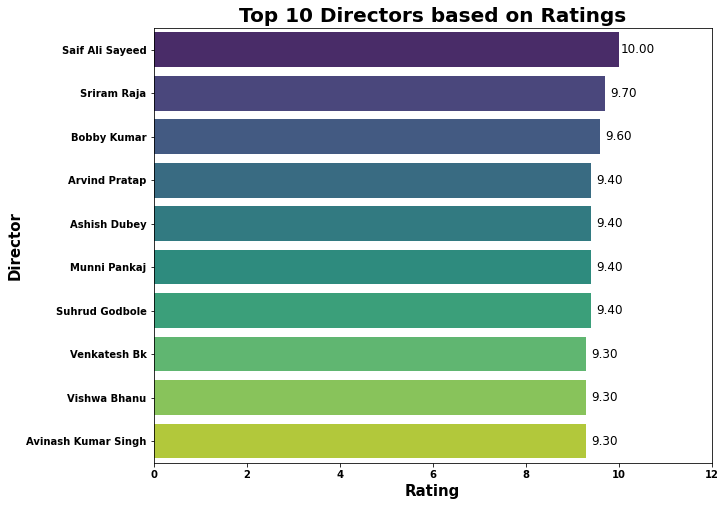

In [385]:
plt.figure(figsize=(10, 8))
# Drop the index where Year is 2022
dframe = data.set_index('Year')
dframe.drop(index='2022', inplace=True, errors='ignore')  # Added errors='ignore' for robustness
# Sorting Name and Rating by Rating, then selecting top 10
top_directors = dframe[['Director', 'Rating']].sort_values(by='Rating', ascending=False).head(10)
# Plotting a horizontal bar chart
plots = sns.barplot(x="Rating", y="Director", data=top_directors, palette='viridis')
# Plotting Labels for bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', size=12, xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Rating", fontsize=15, fontweight='bold')
plt.ylabel("Director", fontsize=15, fontweight='bold')
plt.title("Top 10 Directors based on Ratings", fontsize=20, fontweight='bold')

plt.xticks(np.arange(0, 13, 2), fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()

## Top 10 movies based on Ratings

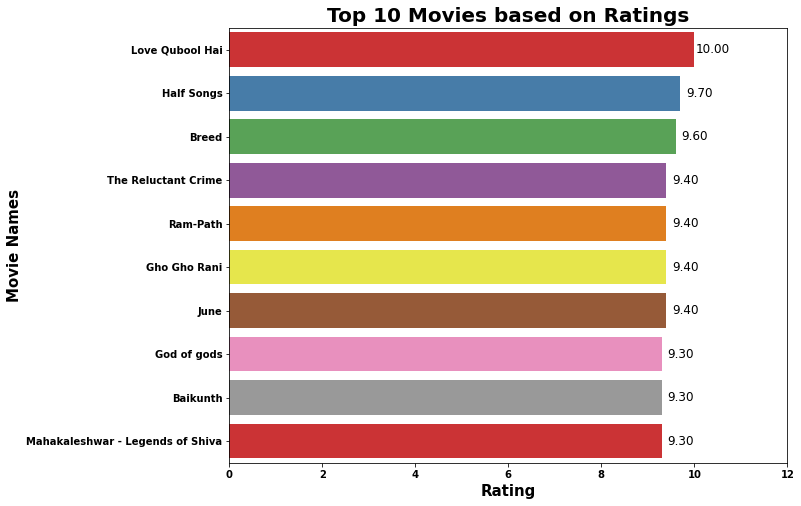

In [386]:
# Initialize the figure of the chart
plt.figure(figsize=(10, 8))

# Drop the index where Year is 2022
dframe = data.set_index('Year')
dframe.drop(index='2022', inplace=True, errors='ignore')  # Added errors='ignore' for robustness

# Sorting Name and Rating by Rating, then selecting top 10
top_movies = dframe[['Name', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Plotting a verical bar chart by swapping x and y values but here I plot it horizontally for better visualization
#plots = sns.barplot(x="Name", y="Rating", data=top_movies, palette='Set1')
plots = sns.barplot(x="Rating", y="Name", data=top_movies, palette='Set1')
# Plotting Labels for bars
for bar in plots.patches:
    plots.annotate(format(bar.get_width(), '.2f'), 
                   (bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2),
                   ha='center', va='center', size=12, xytext=(5, 0),
                   textcoords='offset points')

plt.xlabel("Rating", fontsize=15, fontweight='bold')
plt.ylabel("Movie Names", fontsize=15, fontweight='bold')
plt.title("Top 10 Movies based on Ratings", fontsize=20, fontweight='bold')

plt.xticks(np.arange(0, 13, 2), fontweight='bold')
plt.yticks(fontweight='bold')
plt.show()